In [1]:
# DataFrame handling
import pandas as pd

# Confusion matrix function
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# keras Models
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import CategoricalAccuracy, Precision, Recall
from tensorflow.keras import models, layers, datasets

# Split data with stratified cv
from sklearn.model_selection import StratifiedKFold, train_test_split

# Encoding of classifications
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical, normalize
print('Tensorflow imported')

Tensorflow imported


In [3]:
df = pd.read_csv('./handwritten_data_785.csv')
print(df.shape)
df.head()

(372037, 785)


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = df.drop(labels=['0'], axis=1)
X_train.shape

(372037, 784)

In [5]:
y_train = df['0']
y_train.shape

(372037,)

/Users/bkhadka/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


14    58154
18    48463
20    29117
2     23555
19    22668
15    19378
13    19093
0     14780
12    12454
17    11669
11    11641
4     11493
24    10909
22    10884
3     10599
1      8977
9      8615
7      7265
23     6298
25     6097
16     5890
6      5795
10     5621
5      1164
8      1118
21      340
Name: 0, dtype: int64

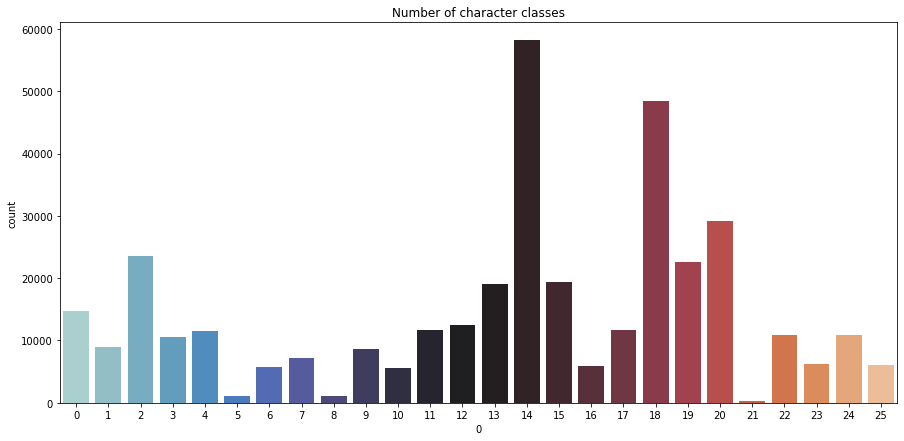

In [7]:
plt.figure(figsize=(15,7))
g = sn.countplot(y_train, palette="icefire")
plt.title("Number of character classes")
y_train.value_counts()

In [8]:
X_train = X_train / 255.0
X_train.shape

(372037, 784)

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)

x_train shape:  (372037, 28, 28, 1)


In [12]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 26)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (297629, 28, 28, 1)
x_test shape (74408, 28, 28, 1)
y_train shape (297629, 26)
y_test shape (74408, 26)


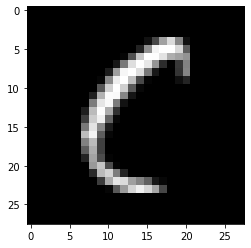

In [24]:
plt.imshow(X_train[200][:,:,0],cmap='gray')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(26, activation = "softmax"))

In [33]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [34]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [35]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [36]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [37]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
1190/1190 [==============================] - 82s 68ms/step - loss: 1.1828 - accuracy: 0.6565 - val_loss: 0.1372 - val_accuracy: 0.9626
Epoch 2/10
1190/1190 [==============================] - 82s 69ms/step - loss: 0.3577 - accuracy: 0.8948 - val_loss: 0.1083 - val_accuracy: 0.9709
Epoch 3/10
1190/1190 [==============================] - 81s 68ms/step - loss: 0.2911 - accuracy: 0.9152 - val_loss: 0.0964 - val_accuracy: 0.9744
Epoch 4/10
1190/1190 [==============================] - 80s 67ms/step - loss: 0.2551 - accuracy: 0.9273 - val_loss: 0.0880 - val_accuracy: 0.9766
Epoch 5/10
1190/1190 [==============================] - 81s 68ms/step - loss: 0.2338 - accuracy: 0.9336 - val_loss: 0.0853 - val_accuracy: 0.9771
Epoch 6/10
1190/1190 [==============================] - 81s 68ms/step - loss: 0.2283 - accuracy: 0.9351 - val_loss: 0.0799 - val_accuracy: 0.9795
Epoch 7/10
1190/1190 [==============================] - 81s 68ms/step - loss: 0.2170 - accuracy: 0.9389 - val_loss: 0.0816 -

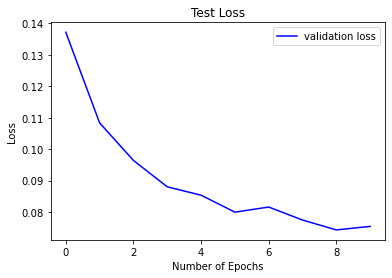

In [38]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

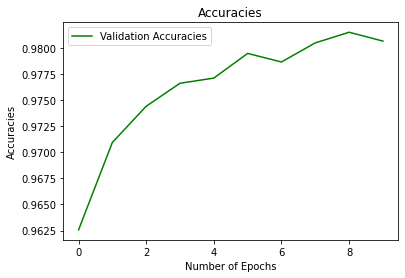

In [49]:
plt.plot(history.history['val_accuracy'], color='g', label="Validation Accuracies")
plt.title("Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracies")
plt.legend()
plt.show()

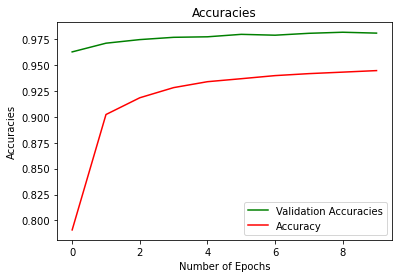

In [50]:
plt.plot(history.history['val_accuracy'], color='g', label="Validation Accuracies")
plt.plot(history.history['accuracy'], color='r', label="Accuracy")
plt.title("Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracies")
plt.legend()
plt.show()

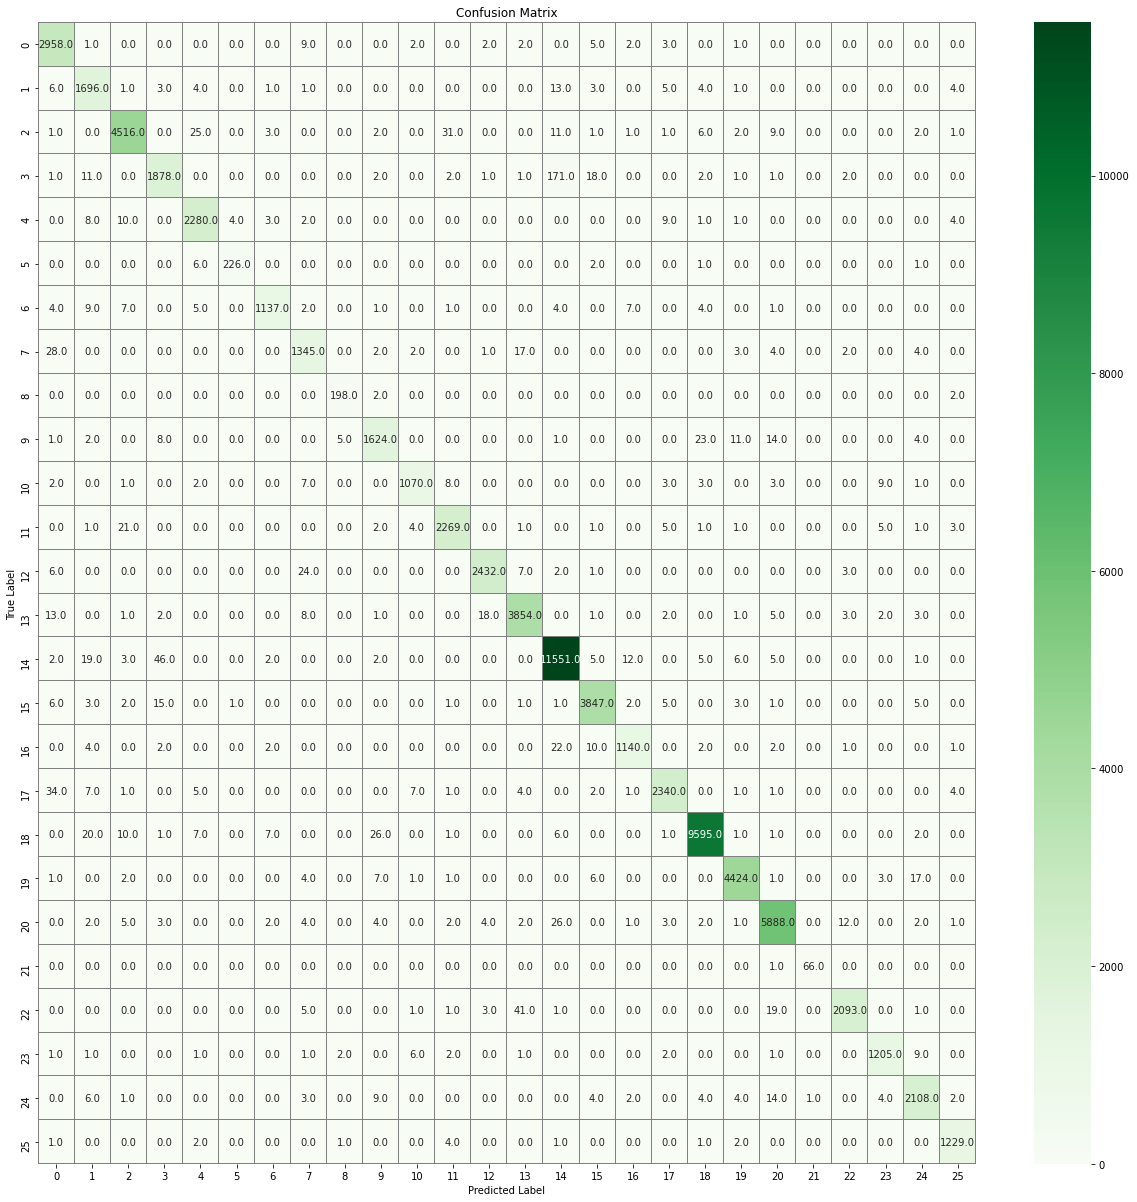

In [47]:
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(21, 21))
sn.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()